In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)


Device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_images = '/content/drive/MyDrive/Final_Project/Data.zip'


In [ ]:
!unzip /content/drive/MyDrive/Final_Project/Data.zip -d /content/drive/MyDrive/extracted_data


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1638064507831_Samsung Galaxy M21 Used for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1639531631924_Samsung Galaxy S9 64GB Used for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1636400144518_Samsung Galaxy A50 4GB 64GB New for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1636620837963_Samsung Galaxy S20FE 128GB Used for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1636615987614_Samsung Galaxy J1 Nxt Used for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1638060537529_Samsung Galaxy A10s Used for sale.jpg  
  inflating: /content/drive/MyDrive/extracted_data/Mobile-Phones/Samsung/1638392677016_Samsung Galaxy S8 64GB Used for sale.jpg  
  inflating: /content/drive/MyDrive/ext

In [ ]:
import os

# Define the path to the extracted data and the "Clothing" folder
base_path = '/content/drive/MyDrive/extracted_data'  # Update this with your extracted folder path
clothing_folder = os.path.join(base_path, 'Clothing')

# Check the contents of the Clothing folder
print(os.listdir(clothing_folder))


['Pants', 'T-Shirt', 'Image_851.jpeg', 'Image_736.jpg', 'Image_357.jpg', 'Image_519.jpeg', 'Image_409.jpg', 'Image_655.jpg', 'Image_1038.jpeg', 'Image_974.jpeg', 'Image_448.jpeg', 'Image_614.jpeg', 'Image_647.jpeg', 'Image_1048.jpg', 'Image_638.jpg', 'Image_716.jpeg', 'Image_729.jpeg', 'Image_1134.jpg', 'Image_242.jpeg', 'Image_1054.png', 'Image_436.jpeg', 'Image_643.jpg', 'Image_899.jpg', 'Image_530.jpeg', 'Image_783.jpg', 'Image_1043.jpg', 'Image_666.jpeg', 'Image_988.png', 'Image_585.jpeg', 'Image_731.jpg', 'Image_623.jpg', 'Image_981.jpeg', 'Image_989.jpeg', 'Image_506.jpeg', 'Image_651.jpeg', 'Image_910.jpg', 'Image_431.jpg', 'Image_288.jpg', 'Image_302.png', 'Image_892.jpg', 'Image_1137.jpg', 'Image_415.jpeg', 'Image_702.jpg', 'Image_526.jpg', 'Image_1011.jpg', 'Image_941.JPG', 'Image_931.jpg', 'Image_1112.jpg', 'Image_618.jpeg', 'Image_1075.jpg', 'Image_429.jpg', 'Image_918.jpg', 'Image_239.jpg', 'Image_292.png', 'Image_628.jpg', 'Image_261.jpeg', 'Image_527.jpg', 'Image_618.jpg

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file to upload


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayaahmadgamal","key":"f08144303c1b96da547ae9160cb6e724"}'}

In [ ]:
!kaggle datasets download -d ziadhanyai/fashion-six-classes


Dataset URL: https://www.kaggle.com/datasets/ziadhanyai/fashion-six-classes
License(s): apache-2.0
100% 1.64G/1.64G [01:14<00:00, 24.8MB/s]
100% 1.64G/1.64G [01:14<00:00, 23.5MB/s]


In [ ]:
!unzip fashion-six-classes.zip -d /content/fashion_data


Streaming output truncated to the last 5000 lines.
  inflating: /content/fashion_data/Fashion/Formal/Image_282.jpeg  
  inflating: /content/fashion_data/Fashion/Formal/Image_283.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_284.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_285.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_286.jpeg  
  inflating: /content/fashion_data/Fashion/Formal/Image_287.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_288.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_289.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_29.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_290.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_291.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_292.jpg  
  inflating: /content/fashion_data/Fashion/Formal/Image_293.jpeg  
  inflating: /content/fashion_data/Fashion/Formal/Image_294.jpeg  
  inflating: /content/

In [ ]:
import os
import shutil

# Define the directories
base_dir = '/content/fashion_data/Fashion'
output_dir = '/content/fashion_classes_output'
others_dir = os.path.join(output_dir, 'others')

# Create output directory for others
os.makedirs(others_dir, exist_ok=True)

# Get the list of all class directories in the base directory
classes = os.listdir(base_dir)

# Loop over the classes and move all classes except 'pants' and 'T-shirt' to the "others" directory
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)

    if class_name not in ['Pants', 'T-Shirt']:
        # Move any other class to the "others" directory
        shutil.copytree(class_path, os.path.join(others_dir, class_name), dirs_exist_ok=True)

print(f"Images from all other classes (except 'pants' and 'T-shirt') have been extracted successfully to 'others' directory!")


Images from all other classes (except 'pants' and 'T-shirt') have been extracted successfully to 'others' directory!


In [ ]:
import os
import shutil

# Define the directories
base_dir = '/content/fashion_data'
output_dir = '/content/fashion_classes_output'
others_dir = os.path.join(output_dir, 'others')
consolidated_dir = os.path.join(output_dir, 'consolidated_others')

# Create output directory for consolidated images
os.makedirs(consolidated_dir, exist_ok=True)

# Get the list of all class directories in the others directory
subdirectories = os.listdir(others_dir)

# Move all images from subdirectories to the consolidated directory
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(others_dir, subdirectory)

    # Check if it's a directory
    if os.path.isdir(subdirectory_path):
        # Move all files from the subdirectory to the consolidated directory
        for file_name in os.listdir(subdirectory_path):
            file_path = os.path.join(subdirectory_path, file_name)
            # Move the file to the consolidated directory
            shutil.move(file_path, os.path.join(consolidated_dir, file_name))

print("All images from subdirectories have been consolidated into one folder.")


All images from subdirectories have been consolidated into one folder.


In [ ]:
# Define the path to your Google Drive folder
drive_folder = '/content/drive/My Drive/fashion_classes'

# Create the destination directory if it doesn't exist
os.makedirs(drive_folder, exist_ok=True)

# Copy the consolidated images to Google Drive
shutil.copytree(consolidated_dir, os.path.join(drive_folder, 'consolidated_others'), dirs_exist_ok=True)

print("Consolidated images have been saved to Google Drive.")


Consolidated images have been saved to Google Drive.


In [ ]:
import os
import shutil

# Define the paths
clothing_dir = '/content/drive/MyDrive/extracted_data/Clothing'
others_dir = '/content/drive/MyDrive/fashion_classes/consolidated_others'

# Define the new 'others' subdirectory within the Clothing directory
others_subdir = os.path.join(clothing_dir, 'others')

# Create the 'others' subdirectory if it doesn't exist
os.makedirs(others_subdir, exist_ok=True)


In [ ]:
# Get a list of all files in the consolidated_others directory
other_files = os.listdir(others_dir)

# Loop through each file and copy it to the others subdirectory
for file_name in other_files:
    source_file_path = os.path.join(others_dir, file_name)
    destination_file_path = os.path.join(others_subdir, file_name)

    # Check if it's a file to avoid errors
    if os.path.isfile(source_file_path):
        shutil.copy2(source_file_path, destination_file_path)

print(f"Successfully copied {len(other_files)} images to 'others' subdirectory within 'Clothing'.")


Successfully copied 2052 images to 'others' subdirectory within 'Clothing'.


In [ ]:
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os


In [ ]:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize pixel values
])


In [ ]:
data='/content/drive/MyDrive/extracted_data/Clothing'

In [ ]:
train_data = datasets.ImageFolder(root=data, transform=transform)

# Split data into training and validation sets (80% training, 20% validation)
train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_data, [train_size, test_size])

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
class_names = train_data.classes
print(class_names)

['Pants', 'T-Shirt', 'others']


CNN: To classify whether the class is T-Shirt or Pants

In [ ]:
import torch
import torch.nn as nn

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        # Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 18 * 18, 512)  # Ensure this is correct based on input size
        self.fc2 = nn.Linear(512, 3)  # Change output to 3 for three classes
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.dropout(x)  # Apply dropout
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.dropout(x)  # Apply dropout
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.dropout(x)  # Apply dropout
        x = x.view(-1, 128 * 18 * 18)  # Flatten for the fully connected layers
        x = nn.functional.relu(self.fc1(x))  # Apply fc1 with ReLU
        x = self.fc2(x)  # No activation function here; we will use CrossEntropyLoss
        return x  # Return raw logits


In [ ]:
model=model()

In [ ]:
#  Cross-Entropy Loss and Adam Optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels,average='macro')
    return precision, recall, f1


In [ ]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # CrossEntropyLoss expects labels as class indices
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        # Track loss
        running_loss += loss.item()

        # Get predicted labels
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    # Calculate metrics at the end of the epoch
    precision, recall, f1 = calculate_metrics(all_labels, all_preds)

    print(f'Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f} '
          f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

print('Training Complete')



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10] Loss: 0.8092 Precision: 0.6478, Recall: 0.5890, F1 Score: 0.5984


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [2/10] Loss: 0.6930 Precision: 0.6898, Recall: 0.6469, F1 Score: 0.6612


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [3/10] Loss: 0.6584 Precision: 0.7158, Recall: 0.6718, F1 Score: 0.6878


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [4/10] Loss: 0.5931 Precision: 0.7461, Recall: 0.6982, F1 Score: 0.7155


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [5/10] Loss: 0.5656 Precision: 0.7554, Recall: 0.7160, F1 Score: 0.7307


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [6/10] Loss: 0.5346 Precision: 0.7825, Recall: 0.7433, F1 Score: 0.7587


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [7/10] Loss: 0.5047 Precision: 0.7946, Recall: 0.7587, F1 Score: 0.7731


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [8/10] Loss: 0.4898 Precision: 0.7894, Recall: 0.7665, F1 Score: 0.7763


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [9/10] Loss: 0.4475 Precision: 0.8152, Recall: 0.7920, F1 Score: 0.8020


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [10/10] Loss: 0.4420 Precision: 0.8193, Recall: 0.7976, F1 Score: 0.8070
Training Complete


In [ ]:
def evaluate(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    all_labels = []  # Initialize lists to store labels and predictions
    all_preds = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest score

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Collect labels and predictions for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Calculate precision, recall, and F1 score using the collected labels and predictions
    precision, recall, f1 = calculate_metrics(all_labels, all_preds)

    print(f'Test Set Accuracy: {correct / total:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Evaluate on the validation data
evaluate(model, test_loader)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Set Accuracy: 0.8051, Precision: 0.8107, Recall: 0.7943, F1 Score: 0.7979


In [ ]:
torch.save(model.state_dict(), 'tshirt_pants_classifier.pth')


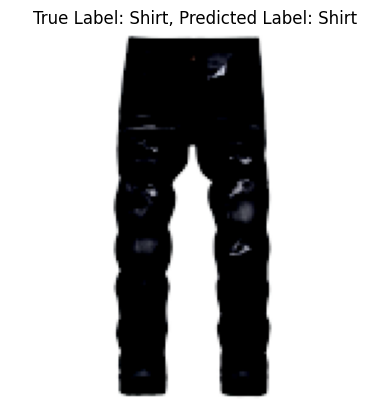

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(model, test_loader):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Get a single batch from the test_loader
        images, labels = next(iter(test_loader))  # Grab a single batch
        images, labels = images.to(device), labels.to(device)  # Move to device

        # Get predictions from the model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest score

        # Get the index of the first sample for visualization
        index = 0
        image = images[index].cpu().numpy().transpose((1, 2, 0))  # Convert from CxHxW to HxWxC for matplotlib
        true_label = labels[index].item()  # Actual label
        predicted_label = predicted[index].item()  # Predicted class index

        # Plot the image and the labels
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        class_names = {0: 'Shirt', 1: 'Pants', 2: 'Others'}
        plt.title(f'True Label: {class_names[true_label]}, Predicted Label: {class_names[predicted_label]}')

        plt.show()

# Call the function to visualize
visualize_prediction(model, test_loader)





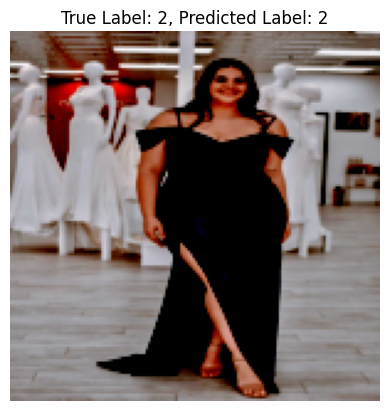

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(model, test_loader):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Get a single batch from the test_loader
        images, labels = next(iter(test_loader))  # Grab a single batch
        images, labels = images.to(device), labels.to(device)  # Move to device

        # Get predictions from the model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest score

        # Get the index of the first sample for visualization
        index = 0
        image = images[index].cpu().numpy().transpose((1, 2, 0))  # Convert from CxHxW to HxWxC for matplotlib
        true_label = labels[index].item()  # Actual label
        predicted_label = predicted[index].item()  # Predicted class index

        # Plot the image and the labels
        plt.imshow(image)
        plt.axis('off')  # Hide axis

        # If you have class names, use them here. Otherwise, display indices.
        plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
        plt.show()

# Call the function to visualize
visualize_prediction(model, test_loader)


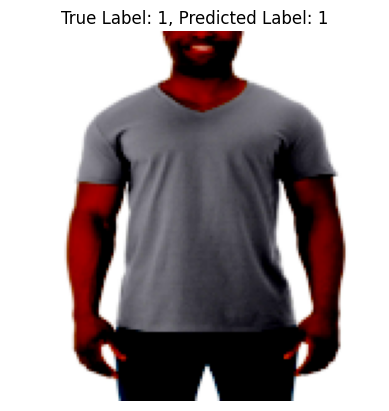

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(model, test_loader):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Get a single batch from the test_loader
        images, labels = next(iter(test_loader))  # Grab a single batch
        images, labels = images.to(device), labels.to(device)  # Move to device

        # Get predictions from the model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest score

        # Get the index of the first sample for visualization
        index = 0
        image = images[index].cpu().numpy().transpose((1, 2, 0))  # Convert from CxHxW to HxWxC for matplotlib
        true_label = labels[index].item()  # Actual label
        predicted_label = predicted[index].item()  # Predicted class index

        # Plot the image and the labels
        plt.imshow(image)
        plt.axis('off')  # Hide axis

        # If you have class names, use them here. Otherwise, display indices.
        plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
        plt.show()

# Call the function to visualize
visualize_prediction(model, test_loader)



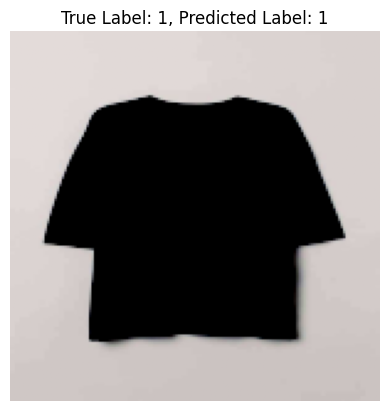

In [ ]:
import matplotlib.pyplot as plt

def visualize_prediction(model, test_loader):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Get a single batch from the test_loader
        images, labels = next(iter(test_loader))  # Grab a single batch
        images, labels = images.to(device), labels.to(device)  # Move to device

        # Get predictions from the model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest score

        # Get the index of the first sample for visualization
        index = 0
        image = images[index].cpu().numpy().transpose((1, 2, 0))  # Convert from CxHxW to HxWxC for matplotlib
        true_label = labels[index].item()  # Actual label
        predicted_label = predicted[index].item()  # Predicted class index

        # Plot the image and the labels
        plt.imshow(image)
        plt.axis('off')  # Hide axis

        # If you have class names, use them here. Otherwise, display indices.
        plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
        plt.show()

# Call the function to visualize
visualize_prediction(model, test_loader)


llms

In [2]:
%%capture
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

In [3]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048 # Set the maximum sequence length for input.
dtype = None # Auto-detect data type. Set to 'float16' for certain GPUs (T4, V100) and 'bfloat16' for Ampere+.
load_in_4bit = True # Use 4-bit quantization to reduce memory usage.


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [4]:
fourbit_models = [
"unsloth/Meta-Llama-3.1-8B-bnb-4bit",
# Other 4-bit pre-quantized models listed here...
]

In [5]:
model, tokenizer = FastLanguageModel.from_pretrained(
model_name = "unsloth/Meta-Llama-3.1-8B",
max_seq_length = max_seq_length,
dtype = dtype,
load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.10.3: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Unsloth: We fixed a gradient accumulation bug, but it seems like you don't have the latest transformers version!
Please update transformers via:
`pip uninstall transformers -y && pip install --upgrade --no-cache-dir "git+https://github.com/huggingface/transformers.git"`


In [6]:
model = FastLanguageModel.get_peft_model(
model,
r = 16, # LoRA rank. Suggested values include 8, 16, 32, etc.
target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
"gate_proj", "up_proj", "down_proj",],
lora_alpha = 16, # Scaling factor for LoRA.
lora_dropout = 0, # Set to 0 for optimized performance.
bias = "none", # Optimized without bias.
use_gradient_checkpointing = "unsloth", # Enabled to reduce memory usage.
random_state = 3407, # Set random seed for reproducibility.
use_rslora = False, # Optional Rank Stabilized LoRA.
loftq_config = None, # Optional LoftQ (quantization-aware training).
)

Unsloth 2024.10.3 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [7]:
def generate_clothing_description(clothing_type):
    # Define descriptions based on clothing type
    if clothing_type.lower() == "t-shirt":
        description = "This t-shirt is made from soft, breathable cotton, perfect for casual wear. It features a comfortable fit, round neckline, and comes in various colors to suit your style. Ideal for layering or wearing on its own."
    elif clothing_type.lower() == "pants":
        description = "These pants are designed for both comfort and style. Made from durable fabric, they offer a relaxed fit with a classic cut. Perfect for both casual and formal occasions, these pants are versatile and easy to pair with any outfit."
    else:
        description = "No description available for this clothing type."

    return description

In [8]:
clothing_type = "pants"
description = generate_clothing_description(clothing_type)

In [9]:
from datasets import load_dataset

def create_prompt(clothing_type):
    description = generate_clothing_description(clothing_type)
    return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
### Instruction:
Generate a clothing description.
### Input:
{clothing_type}
### Response:
{description}"""


In [10]:
from datasets import load_dataset

def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs = examples["input"]
    outputs = examples["output"]
    texts = []

    for instruction, input_text, output in zip(instructions, inputs, outputs):
        # Generate clothing description based on the input
        description = generate_clothing_description(input_text)  # Call the description function
        text = create_prompt(input_text)  # Create prompt
        texts.append(text)

    return {"text": texts}

# Load the dataset and apply the formatting function
dataset = load_dataset("yahma/alpaca-cleaned", split="train")
dataset = dataset.map(formatting_prompts_func, batched=True)


README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

alpaca_data_cleaned.json:   0%|          | 0.00/44.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/51760 [00:00<?, ? examples/s]

Map:   0%|          | 0/51760 [00:00<?, ? examples/s]

In [11]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

In [14]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
model = model,
tokenizer = tokenizer,
train_dataset = dataset,
dataset_text_field = "text",
max_seq_length = max_seq_length,
dataset_num_proc = 2,
packing = False, # Can speed up training for shorter sequences.
args = TrainingArguments(
  per_device_train_batch_size = 2,
  gradient_accumulation_steps = 4,
  warmup_steps = 5,
  max_steps = 30,  # the best 150
  learning_rate = 2e-4,
  fp16 = not is_bfloat16_supported(), # Enable mixed precision if supported.
  bf16 = is_bfloat16_supported(), # Enable BF16 if supported.
  logging_steps = 1,
  optim = "adamw_8bit", # Use 8-bit Adam optimizer.
  weight_decay = 0.01,
  lr_scheduler_type = "linear",
  seed = 3407,
  output_dir = "outputs",
),
)

max_steps is given, it will override any value given in num_train_epochs


In [15]:
trainer_stats = trainer.train()

**** Unsloth: Please use our fixed gradient_accumulation_steps by updating transformers and Unsloth!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 51,760 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 30
 "-____-"     Number of trainable parameters = 41,943,040


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
1,3.731700
2,3.763700
3,3.444200
4,3.245800
5,2.728400
6,2.243200
7,1.732700
8,1.268400
9,0.940000
10,0.807100


In [18]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
### Instruction:
{}
### Input:
{}
### Response:
{}"""

In [20]:
# alpaca_prompt
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
alpaca_prompt.format(
   'Generate a clothing description.',
'pants',
"",

)
], return_tensors = "pt").to("cuda")


# Generate the output from the model
outputs = model.generate(**inputs, max_new_tokens=128, use_cache=True)

# Decode the generated output
decoded_output = tokenizer.batch_decode(outputs)

# Post-process to remove special tokens and clean up the text
cleaned_output = decoded_output[0].replace("<|begin_of_text|>", "").replace("<|end_of_text|>", "").strip()

# Print the readable output
print(cleaned_output)

Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
### Instruction:
Generate a clothing description.
### Input:
pants
### Response:
No description available for this clothing type.
